# Lists and Deque

## List Comprehension

In [2]:
def for_loop(n):
    my_list = []
    for i in range(n):
        my_list.append(i)
    return my_list

def list_comp(n):
    return [i for i in range(n)]

In [53]:
from time import perf_counter
from statistics import mean

n = [i for i in range(100, 100_000, 1_000)]
for_loop_time = []
list_comp_time = []

for i in n:
    tmp_for = []
    tmp_comp = []
    for j in range(10):
        start = perf_counter()
        for_loop(i)
        end = perf_counter()
        tmp_for.append(end-start)
        start = perf_counter()
        list_comp(i)
        end = perf_counter()
        tmp_comp.append(end-start)
    for_loop_time.append(mean(tmp_for))
    list_comp_time.append(mean(tmp_comp))

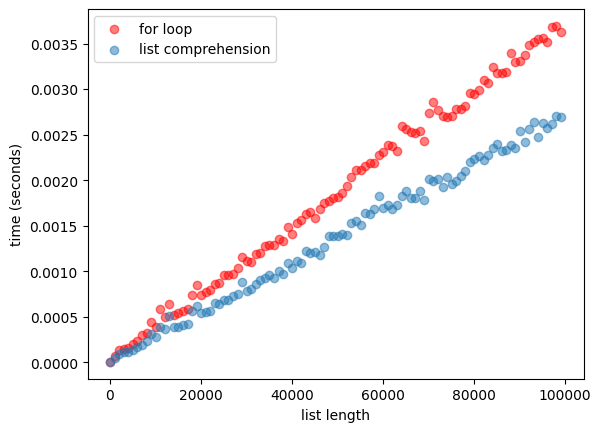

In [54]:
import matplotlib.pyplot as plt

plt.scatter(n, for_loop_time, color='red', label='for loop', alpha=0.5)
plt.scatter(n, list_comp_time, color='tab:blue', label='list comprehension', alpha=0.5)
plt.xlabel('list length')
plt.ylabel('time (seconds)')
plt.legend()
plt.yscale('linear')

## Deque (The Josephus Permutation)

In [6]:
def solution_with_list(array, k):
    permutation = []
    index = 0
    while array:
        index = (index + k-1) % len(array)
        item = array.pop(index)
        permutation.append(item)
    return permutation

In [7]:
soldiers = 7
arr = [s+1 for s in range(soldiers)]
k = 3
perm = solution_with_list(arr, k)
print(perm)

[3, 6, 2, 7, 5, 1, 4]


In [48]:
from collections import deque

def solution_with_deque(array, k):
    d = deque(array)
    permutation = []
    while d:
        d.rotate(1-k)
        item = d.popleft()
        permutation.append(item)
    return permutation

In [49]:
soldiers = 7
arr = [s+1 for s in range(soldiers)]
k = 3
perm = solution_with_deque(arr, k)
print(perm)

[3, 6, 2, 7, 5, 1, 4]


In [55]:
from time import perf_counter
from statistics import mean

n_soldiers = [i for i in range(100, 10_000, 100)]
list_time = []
deque_time = []

k = 3

for soldiers in n_soldiers:
    tmp_list = []
    tmp_deque = []
    arr = [s+1 for s in range(soldiers)]
    for j in range(10):
        start = perf_counter()
        solution_with_list(arr, k)
        end = perf_counter()
        tmp_list.append(end-start)
        start = perf_counter()
        solution_with_deque(arr, k)
        end = perf_counter()
        tmp_deque.append(end-start)
    list_time.append(mean(tmp_list))
    deque_time.append(mean(tmp_deque))

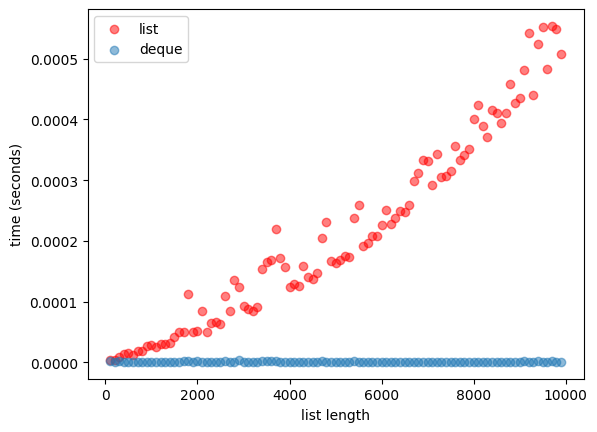

In [56]:
import matplotlib.pyplot as plt

plt.scatter(n_soldiers, list_time, color='red', label='list', alpha=0.5)
plt.scatter(n_soldiers, deque_time, color='tab:blue', label='deque', alpha=0.5)
plt.xlabel('list length')
plt.ylabel('time (seconds)')
plt.legend()
plt.yscale('linear')